In [43]:
%matplotlib inline
import numpy as np
np.set_printoptions(edgeitems=10)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [44]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
gm_df = pd.read_csv('data/gendermodel.csv')
test_df.insert(1, 'Survived', gm_df['Survived'])
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
test_df = test_df.dropna()
train_df = train_df.dropna()
def create_family(df):
    family = df['SibSp'].values + df['Parch'].values
    df = df.drop(['SibSp', 'Parch'], axis=1)
    df.insert(4, 'Family', family)
    return df
train_df = create_family(train_df)
test_df = create_family(test_df)
train_df.head()

,Survived,Pclass,Sex,Age,Family,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [46]:
train_X = train_df.iloc[:, 1:].values
train_y = train_df.iloc[:, 0].values
test_X = test_df.iloc[:, 1:].values
test_y = test_df.iloc[:,0].values

In [47]:
# switch pclass labels since 1st class is greater than 3rd class
map_dict = {1: 3, 2: 2, 3: 1}
def val_map(val):
    return map_dict[val]
arr_map = np.vectorize(val_map)
train_X[:, 0] = arr_map(train_X[:, 0])
test_X[:, 0] = arr_map(test_X[:, 0])

sex_le = LabelEncoder()
train_X[:, 1] = sex_le.fit_transform(train_X[:, 1])
test_X[:, 1] = sex_le.transform(test_X[:, 1])

embarked_le = LabelEncoder()
train_X[:, 5] = embarked_le.fit_transform(train_X[:, 5])
test_X[:, 5] = embarked_le.transform(test_X[:, 5])
print(embarked_le.classes_)

train_X

['C' 'Q' 'S']


array([[1, 1, 22.0, 1, 7.25, 2],
       [3, 0, 38.0, 1, 71.2833, 0],
       [1, 0, 26.0, 0, 7.925, 2],
       [3, 0, 35.0, 1, 53.1, 2],
       [1, 1, 35.0, 0, 8.05, 2],
       [3, 1, 54.0, 0, 51.8625, 2],
       [1, 1, 2.0, 4, 21.075, 2],
       [1, 0, 27.0, 2, 11.1333, 2],
       [2, 0, 14.0, 1, 30.0708, 0],
       [1, 0, 4.0, 2, 16.7, 2],
       ..., 
       [2, 0, 25.0, 1, 26.0, 2],
       [1, 1, 33.0, 0, 7.8958, 2],
       [1, 0, 22.0, 0, 10.5167, 2],
       [2, 1, 28.0, 0, 10.5, 2],
       [1, 1, 25.0, 0, 7.05, 2],
       [1, 0, 39.0, 5, 29.125, 1],
       [2, 1, 27.0, 0, 13.0, 2],
       [3, 0, 19.0, 0, 30.0, 2],
       [3, 1, 26.0, 0, 30.0, 0],
       [1, 1, 32.0, 0, 7.75, 1]], dtype=object)

In [48]:
# now to do one hot encoding on the nominal features
ohe = OneHotEncoder(categorical_features=[1, 5])
ohe.fit(train_X)
train_X = ohe.transform(train_X).toarray()
test_X = ohe.transform(test_X).toarray()

In [49]:
# for future reference:
total_features = [
    'Male',
    'Female',
    'Cherbourg',
    'Queenstown',
    'Southampton',
    'PClass',
    'Age',
    'Family',
    'Fare'
]
for index, feature in zip(range(9), total_features):
    print(index, feature)

0 Male
1 Female
2 Cherbourg
3 Queenstown
4 Southampton
5 PClass
6 Age
7 Family
8 Fare


In [50]:
scaler = StandardScaler()
train_X[:, 6:] = scaler.fit_transform(train_X[:, 6:])
test_X[:, 6:] = scaler.transform(test_X[:, 6:])

In [51]:
log = LogisticRegression()
log.fit(train_X, train_y)
pred_y = log.predict(test_X)
print(accuracy_score(test_y, pred_y))
print(classification_report(test_y, pred_y, target_names=total_features))
log.coef_[0].dtype

0.918429003021
             precision    recall  f1-score   support

       Male       0.95      0.91      0.93       204
     Female       0.87      0.93      0.90       127

avg / total       0.92      0.92      0.92       331



dtype('float64')

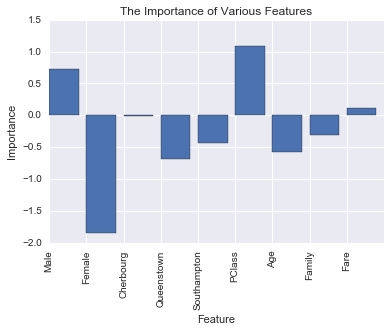

In [61]:
plt.bar(list(range(9)), log.coef_[0])
plt.xticks(list(range(9)), total_features, rotation=90, )
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('The Importance of Various Features')
plt.show()